In [61]:
import numpy as np

def transpose(M):
    '''Input matrix M represented with a nested list, where each inner list is a row, 
    outputs transpose with row and column swapped'''
    MT=[]
    for o in range(len(M[0])):
        MT.append([0]*len(M))
    for m in range(len(M[0])):
        for n in range(len(M)):
            MT[m][n]=M[n][m]
    return MT

def multiplymatrix(A,B):
    '''Multiplies two input matrices A and B with AXB, where
    each matrix is nested list where each inner list is a row'''
    M=[]
    for p in range(len(A)):
        M.append([0]*len(A))
    for i in range(len(A)):
        for j in range(len(B[i])):
            for k in range(len(B)):
                M[i][j]+=A[i][k]*B[k][j]
    return M

def multiplyvector(A, a):
    '''Multiplies matrix A (nested list) with vector a (list), returns a vector'''
    b=[]
    for k in range(len(CT)):
        b.append(0)
    for i in range(len(A)):
        for j in range(len(a)):
            b[i]+=A[i][j]*a[j]
    return b

def nthpolynomialmatrixparameter (t, n):
    '''Given list t of length k and integer n, return nth polynomial matrix thing look like:
    1, t[1], t[1]^2, t[1]^3 ... t[1]^n
    1, t[2], t[2]^2, t[2]^3 ... t[2]^n
    .
    .
    1, t[k], t[k]^2, t[k]^3 ... t[k]^n
    '''
    component = []
    C = []
    for i in range(len(t)):
        for j in range(n):
            component.append(t[i]**j)
        C.append(component)
        component = []
    return C

def sinusoidalmatrixparameter (t):
    '''Given list t of length k, return sinusoidal matrix thing look like:
    1, sint[1], cost[1]
    1, sint[2], cost[2]
    .
    .
    1, sint[k], cost[k]
    '''
    C = []
    for i in range(len(t)):
        print([1, np.sin(t[i]), np.cos(t[i])])
        C.append([1, np.sin(t[i]), np.cos(t[i])])
    return C

# Use the above functions as wells as prof's lu decomp
# First pick either sinusoidalmatrixparameter or nthpolynomial to get the thing C
# Then take CT with the transpose functyion
# Then use matrix multiply to multiply C and CT for A
# Then use vector multiply to multiply CT and other parameter vector to get b
# Plug in A, b and ind vector filled with zero into prof's lu decomp thing
# Also feel free to rename any function
# Gl friend

In [62]:
import matplotlib.pyplot as plt
import numpy

def plotluthingpoly (time, parameter, step, b):
    #For scatter, need list time, parameter
    plt.plot(time, parameter, 'ro')
    #For best fit, needs step as well as b for polynomial
    t = numpy.linspace(time[0],time[-1],step)
    y = 0
    for i in range(len(b)):
        y += b[i]*(t**i)
    plt.plot(t,y)
    plt.show()

def plotluthingsine (time, parameter, step, b):
    #For scatter, need list time, parameter
    plt.plot(time, parameter, 'ro')
    #For best fit, needs step as well as b for polynomial
    t = numpy.linspace(time[0],time[-1],step)
    y = b[0] + b[1]*np.sin(t) + b[2]*np.cos(t)
    plt.plot(t,y)
    plt.show()

Below is example with the thing in a3

In [63]:
def swap_rows(a,i1,i2):
    for k in range(len(a)):
        temp = a[i1][k]
        a[i1][k] = a[i2][k]
        a[i2][k] = temp

def lu_decomposition(a, indx):
    n = len(a)
    for j in range(n):
        for i in range(j):
            s = a[i][j]
            for k in range(i):
                s -= a[i][k]*a[k][j]
            a[i][j] = s
        big = 0.
        for i in range(j,n):
            s = a[i][j]
            for k in range(j):
                s -= a[i][k]*a[k][j]
            a[i][j] = s
            temp = abs(s)
            if temp >= big:
                big = temp
                imax = i
        if j != imax:
            swap_rows(a,j,imax)
        indx[j] = imax
        d = 1./a[j][j]
        for i in range(j+1,n):
            a[i][j] *= d

def lu_substitute(a, indx, b):
    n = len(a)
    for i in range(n):
        imax = indx[i]
        s = b[imax]
        b[imax] = b[i]
        for j in range(i):
            s -= a[i][j]*b[j]
        b[i] = s
    for i in reversed(range(n)):
        for j in range(i+1,n):
            b[i] -= a[i][j]*b[j]
        b[i] = b[i]/a[i][i]

In [83]:
year = [1980,  1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
temp = [0.135, 0.317, -0.002, 0.331, -0.045, -0.033, 0.120, 0.252, 0.375, 0.245, 0.492, 0.397, 0.093, 0.175, 0.343, 0.592, 0.227, 0.518, 0.835, 0.561, 0.484, 0.681, 0.778, 0.770, 0.674, 0.882, 0.810, 0.909, 0.695, 0.731, 0.901, 0.695, 0.751, 0.791, 0.762]

In [84]:
#solves the thing we did in class but with 5 parameters
C = nthpolynomialmatrixparameter (year, 5)
CT = transpose(C)
A = multiplymatrix(CT,C)
b = multiplyvector(CT,temp)
ind=[]
for l in range(len(temp)):
    ind.append(0)
lu_decomposition(A,ind)
lu_substitute(A,ind,b)
print(b)


[-2858.6302463773127, 345.9581573244889, -0.5157067392572479, 0.00025765859680864777, -4.29686792665968e-08]


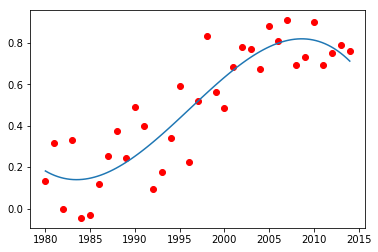

In [85]:
plotluthingpoly (year, temp, 100, b)

In [91]:
temp = [0,-.7,-1,-.7,0,.7,1,.7,0,-.7,-1,-.7,0,.7,1,.7,0,-.7,-1,-.7,0,.7,1,.7,0,-.7,-1,-.7,0,.7,1,.7,0,-.7,1]

In [92]:
#solves the thing we did in class but with sine
C = sinusoidalmatrixparameter (year)
CT = transpose(C)
A = multiplymatrix(CT,C)
b = multiplyvector(CT,temp)
ind=[]
for l in range(len(temp)):
    ind.append(0)
lu_decomposition(A,ind)
lu_substitute(A,ind,b)
print(b)

[1, 0.71500288871616191, 0.69912149811570212]
[1, 0.97460816499551506, -0.22391722739457742]
[1, 0.33816318901382436, -0.9410874866854837]
[1, -0.60918746342772934, -0.79302625076506073]
[1, -0.99645397140575476, 0.084139662880827887]
[1, -0.46758529345625999, 0.88394795850401919]
[1, 0.49117914691685866, 0.8710585776134846]
[1, 0.99835574480330891, 0.057321957557556182]
[1, 0.58764867507100504, -0.80911620592303812]
[1, -0.36333987644086646, -0.93165666110855228]
[1, -0.98027542118069533, -0.1976362786256875]
[1, -0.69595026445871655, 0.71808998697923809]
[1, 0.22822835586752285, 0.97360763019709706]
[1, 0.94257487833815057, 0.33399490823337513]
[1, 0.7903224045714452, -0.6126911920636765]
[1, -0.088548843199741295, -0.99607183594758242]
[1, -0.88600869289699835, -0.46366862748190385]
[1, -0.86887623638318801, 0.49502937877320613]
[1, -0.05290297516673631, 0.99859965712917587]
[1, 0.81170903744344292, 0.58406201599884877]
[1, 0.93003950441613703, -0.36745954910083134]
[1, 0.1932959401

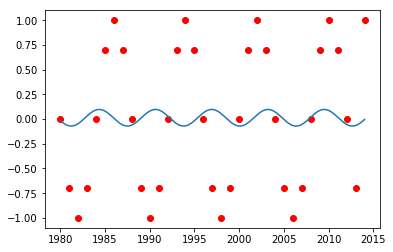

In [93]:
plotluthingsine (year, temp, 1000, b)